In [128]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 행정구역 GeoPandas DataFrame 로드

In [81]:
ctprvn_gdf = gpd.read_file("ctprvn_20230729/ctprvn.shp", encoding='euc-kr')
ctprvn_gdf.geometry = ctprvn_gdf.geometry.set_crs('EPSG:5179')
ctprvn_gdf.geometry = ctprvn_gdf.geometry.to_crs('EPSG:4326')

ctprvn_gdf

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((127.12667 37.46863, 127.12667 37.468..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((129.12699 35.15348, 129.12696 ..."
2,27,Daegu,대구광역시,"POLYGON ((128.47278 35.83345, 128.47278 35.833..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((125.79162 36.92244, 125.79169 ..."
4,29,Gwangju,광주광역시,"POLYGON ((126.76029 35.25870, 126.76105 35.258..."
5,30,Daejeon,대전광역시,"POLYGON ((127.39892 36.48910, 127.40016 36.487..."
6,31,Ulsan,울산광역시,"MULTIPOLYGON (((129.34886 35.37410, 129.34886 ..."
7,36,Sejong-si,세종특별자치시,"POLYGON ((127.17841 36.59687, 127.17839 36.596..."
8,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((126.73088 37.04639, 126.73141 ..."
9,43,Chungcheongbuk-do,충청북도,"POLYGON ((127.98141 37.25688, 127.98188 37.256..."


In [82]:
sig_gdf = gpd.read_file("sig_20230729/sig.shp", encoding='euc-kr')
sig_gdf.geometry = sig_gdf.geometry.set_crs('EPSG:5179')
sig_gdf.geometry = sig_gdf.geometry.to_crs('EPSG:4326')

sig_gdf

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
1,11140,Jung-gu,중구,"POLYGON ((127.02314 37.57196, 127.02336 37.571..."
2,11170,Yongsan-gu,용산구,"POLYGON ((126.96918 37.55566, 126.96917 37.554..."
3,11200,Seongdong-gu,성동구,"POLYGON ((127.04341 37.57234, 127.04524 37.571..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."
...,...,...,...,...
245,51790,Hwacheon-gun,화천군,"POLYGON ((127.81765 38.28798, 127.81962 38.287..."
246,51800,Yanggu-gun,양구군,"MULTIPOLYGON (((128.03050 38.29128, 128.03055 ..."
247,51810,Inje-gun,인제군,"POLYGON ((127.97751 37.95707, 127.97872 37.957..."
248,51820,Goseong-gun,고성군,"MULTIPOLYGON (((128.54881 38.30195, 128.54881 ..."


In [83]:
emd_gdf = gpd.read_file("emd_20230729/emd.shp", encoding='euc-kr')
emd_gdf.geometry = emd_gdf.geometry.set_crs('EPSG:5179')
emd_gdf.geometry = emd_gdf.geometry.to_crs('EPSG:4326')

emd_gdf

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,11110105,Changseong-dong,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."
...,...,...,...,...
5060,51830310,Seo-myeon,서면,"POLYGON ((128.40425 38.09607, 128.40504 38.096..."
5061,51830320,Sonyang-myeon,손양면,"MULTIPOLYGON (((128.67444 38.08345, 128.67444 ..."
5062,51830330,Hyeonbuk-myeon,현북면,"MULTIPOLYGON (((128.73582 38.01976, 128.73582 ..."
5063,51830340,Hyeonnam-myeon,현남면,"MULTIPOLYGON (((128.80236 37.92274, 128.80333 ..."


# 산불통계데이터

In [84]:
df = pd.read_csv('산림청_산불상황관제시스템 산불통계데이터_20241016.csv')
df

,발생일시_년,발생일시_월,발생일시_일,발생일시_시간,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_관서,발생장소_시도,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인_구분,발생원인_세부원인,발생원인_기타,피해면적_합계
0,2024,9,29,15:41,일,2024,9,30,16:30,전북,전북,남원,산동,부절,기,작업장실화,산업현장실화,0.31
1,2024,9,10,15:55,화,2024,9,10,18:00,경남,경남,밀양,NaN,내이,기,기타(직접입력),성묘객실화(벌집소각),0.10
2,2024,9,10,14:35,화,2024,9,10,17:52,충남,충남,부여,규암,수목,기,기타(직접입력),원인미상,0.03
3,2024,9,10,14:24,화,2024,9,10,22:00,경북,경북,상주,화동,신촌,기,기타(직접입력),조사중,1.00
4,2024,9,5,13:51,목,2024,9,5,16:10,경북,경북,안동,녹전,매정,NaN,기타(직접입력),농산폐기물소각,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,2022,1,3,12:36,월,2022,1,3,15:35,대구,대구,달성,옥포,반송,기,기타(직접입력),화목난로비화,0.08
1566,2022,1,3,12:02,월,2022,1,3,14:56,강원,강원,인제,남,수산,기,기타(직접입력),화목보일러재투기,0.80
1567,2022,1,2,14:29,일,2022,1,2,16:50,전남,전남,보성,조성,귀산,담,담뱃불실화,담뱃불실화,0.10
1568,2022,1,2,08:18,일,2022,1,2,12:50,경북,경북,군위,부계,신화,NaN,주택화재비화,축사전기누전,0.20


## 결측치 제거

In [85]:
df.dropna(subset=['발생장소_시도', '발생장소_시군구', '발생장소_읍면', '발생장소_동리'], inplace=True)
df.reset_index(inplace=True)

## 행정구역 코드 매핑

### 시·도

시·도의 처음 두 글자(예: 강원도 -> 강원)을 추출하여 대조

In [96]:
ctprvn_map = dict(zip(ctprvn_gdf['CTP_KOR_NM'].apply(lambda x: x[:2]), ctprvn_gdf['CTPRVN_CD']))
df['CTPRVN_CD'] = df['발생장소_시도'].map(ctprvn_map)

In [98]:
df['CTPRVN_CD'].isna().sum()

821

In [99]:
df[df['CTPRVN_CD'].isna()]['발생장소_시도'].unique()

array(['전북', '충남', '경북', '경남', '전남', '충북', '충남 '], dtype=object)

#### 결측치 처리

결측치는 지역명을 처음 두 글자로 축약할 수 없는 경우에 발생하였다. 예: 경상북도 -> 경상(X) 경북(O)

In [145]:
ctprvn_full_name_map = {
    '충북': '충청북도',
    '충남': '충청남도',
    '충남 ': '충청남도',
    '전북': '전라북도',
    '전남': '전라남도',
    '경북': '경상북도',
    '경남': '경상남도',
}
ctprvn_map = dict(zip(ctprvn_gdf['CTP_KOR_NM'], ctprvn_gdf['CTPRVN_CD']))
df.loc[df['CTPRVN_CD'].isna(), 'CTPRVN_CD'] = df.loc[df['CTPRVN_CD'].isna(), '발생장소_시도'].map(ctprvn_full_name_map).map(ctprvn_map)

df['CTPRVN_CD'].isna().sum()

0

### 시군구

시·군·구는 동일한 행정구역명이 서로 다른 시·도에 존재할 수 있으므로 이름만으로 대조할 수 없다. 시·도 행정구역 코드(`CTPRVN_CD`)와 시·군·구 행정구역명을 동시에 사용하여 `sig_gdf`의 `SIG_CD`가 `CTPRVN_CD`로 시작하는 데이터만을 추출한 후, 해당 데이터 내에서 행정구역명을 대조한다.

In [ ]:
sig_ctprvn_prefix = np.vectorize(lambda x: x[:2])(sig_gdf['SIG_CD'].values)
sig_ctprvn_prefix

array(['11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11',
       '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11',
       '11', '11', '11', '26', '26', '26', '26', '26', '26', '26', '26',
       '26', '26', '26', '26', '26', '26', '26', '26', '27', '27', '27',
       '27', '27', '27', '27', '27', '27', '28', '28', '28', '28', '28',
       '28', '28', '28', '28', '28', '29', '29', '29', '29', '29', '30',
       '30', '30', '30', '30', '31', '31', '31', '31', '31', '36', '41',
       '41', '41', '41', '41', '41', '41', '41', '41', '41', '41', '41',
       '41', '41', '41', '41', '41', '41', '41', '41', '41', '41', '41',
       '41', '41', '41', '41', '41', '41', '41', '41', '41', '41', '41',
       '41', '41', '41', '41', '41', '41', '41', '41', '43', '43', '43',
       '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43',
       '44', '44', '44', '44', '44', '44', '44', '44', '44', '44', '44',
       '44', '44', '44', '44', '44', '45', '45', '4

In [ ]:
df['SIG_CD'] = np.nan
for i, em_kor_nm, sig_code in df[['발생장소_시군구', 'CTPRVN_CD']].itertuples():
    # ctprvn_code에 해당하는 SIG_CD의 색인 범위 파악
    low = np.searchsorted(sig_ctprvn_prefix, sig_code, side='left')
    high = np.searchsorted(sig_ctprvn_prefix, sig_code, side='right')

    # 해당하는 범위에서 sig_kor_nm으로 시작하는 SIG_KOR_NM의 SIG_CD 파악
    for SIG_KOR_NM, SIG_CD in sig_gdf[['SIG_KOR_NM', 'SIG_CD']].values[low:high]:
        if SIG_KOR_NM.startswith(em_kor_nm):
            df.iat[i, -1] = SIG_CD
            break

/var/folders/xv/0hny2vys32s2wxvrfgcj8wlw0000gn/T/ipykernel_27610/2394534701.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '45190' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iat[i, -1] = SIG_CD


In [ ]:
df['SIG_CD'].isna().sum()

69

In [105]:
df[df['SIG_CD'].isna()]['발생장소_시군구'].unique()

array(['천안 동남', '용인 처인', '진해', '청주 상당', '강릉 ', '포항 북', '창원 마산합포', '군위',
       '청주 청원', '포항 남', '수원 장안', '청주 서원', '창원 의창', '청주 흥덕', '천안 서북'],
      dtype=object)

#### 결측치 제거

In [108]:
sig_full_name_map = {
    '천안 동남': '천안시 동남구',
    '용인 처인': '용인시 처인구',
    '진해': '창원시 진해구',
    '청주 상당': '청주시 상당구',
    '강릉 ': '강릉시',
    '포항 북' : '포항시 북구',
    '창원 마산합포': '창원시 마산합포구',
    '군위': '군위군',
    '청주 청원': '청주시 청원구',
    '포항 남': '포항시 남구',
    '수원 장안': '수원시 장안구',
    '청주 서원': '청주시 서원구',
    '창원 의창': '창원시 의창구',
    '청주 흥덕': '청주시 흥덕구',
    '천안 서북': '천안시 서북구',
}
sig_map = dict(zip(sig_gdf['SIG_KOR_NM'], sig_gdf['SIG_CD']))
df.loc[df['SIG_CD'].isna(), 'SIG_CD'] =  df.loc[df['SIG_CD'].isna(), '발생장소_시군구'].map(sig_full_name_map).map(sig_map)

df['SIG_CD'].isna().sum()

0

### 읍면동

In [109]:
emd_sig_prefix = np.vectorize(lambda x: x[:5])(emd_gdf['EMD_CD'].values) # Extract SIG code
emd_sig_prefix

array(['11110', '11110', '11110', ..., '51830', '51830', '51830'],
      dtype='<U5')

In [135]:
df['EMD_CD'] = np.nan

for i, em_kor_nm, dongli_kor_nm, sig_code in df[['발생장소_읍면', '발생장소_동리', 'SIG_CD']].itertuples():
    # ctprvn_code에 해당하는 EMD_CD의 색인 범위 파악
    low = np.searchsorted(emd_sig_prefix, sig_code, side='left')
    high = np.searchsorted(emd_sig_prefix, sig_code, side='right')

    # 해당하는 범위에서 emd_kor_nm으로 시작하는 EMD_KOR_NM의 EMD_CD 파악
    for EMD_KOR_NM, EMD_CD in emd_gdf[['EMD_KOR_NM', 'EMD_CD']].values[low:high]:
        if EMD_KOR_NM.startswith(em_kor_nm) or EMD_KOR_NM.startswith(dongli_kor_nm):
            df.iat[i, -1] = EMD_CD
            break

/var/folders/xv/0hny2vys32s2wxvrfgcj8wlw0000gn/T/ipykernel_27610/4154175765.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '45190410' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iat[i, -1] = EMD_CD


In [136]:
df['EMD_CD'].isna().sum()

56

In [137]:
df[df['EMD_CD'].isna()]

,index,발생일시_년,발생일시_월,발생일시_일,발생일시_시간,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,...,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인_구분,발생원인_세부원인,발생원인_기타,피해면적_합계,CTPRVN_CD,SIG_CD,EMD_CD
8,9,2024,8,15,11:38,목,2024,8,15,12:08,...,안산,단원,선부,기,기타(직접입력),원인미상,0.01,41,41271,NaN
14,16,2024,6,21,06:35,금,2024,6,21,08:25,...,부여,새도,청포,기,기타(직접입력),원인미상,0.50,44,44760,NaN
35,41,2024,5,28,11:35,화,2024,5,28,13:06,...,포항,북,환호,기,기타(직접입력),조사중,0.30,47,47111,NaN
50,61,2024,4,23,16:52,화,2024,4,23,17:13,...,성남,분당,이매,담,기타(직접입력),담뱃불실화,0.01,41,41131,NaN
77,92,2024,4,8,17:18,월,2024,4,8,17:47,...,안산,단원,선부,기,기타(직접입력),어린이불장난,0.01,41,41271,NaN
78,93,2024,4,8,15:02,월,2024,4,8,17:24,...,진해,진례,고모,입,기타(직접입력),입산자실화추정,0.14,48,48129,NaN
80,95,2024,4,8,06:08,월,2024,4,8,11:00,...,성남,분당,백현,담,담뱃불실화,담뱃불실화,0.53,41,41131,NaN
95,115,2024,4,2,12:05,화,2024,4,2,14:13,...,용인,수지,동천,기,작업장실화,산업현장실화,1.26,41,41461,NaN
123,145,2024,3,20,13:48,수,2024,3,20,15:30,...,전주,덕진,산정,기,작업장실화,용접실화,0.82,45,45111,NaN
152,181,2024,3,10,15:34,일,2024,3,10,17:00,...,안산,단원,대부동,쓰,기타(직접입력),쓰레기소각,0.03,41,41271,NaN


어딜봐서 성남시 분당구가 읍면이냐??

# 시군구 대표점 추출

대표점은 GeoPandas Geometry의 근사된 중심점으로, 항상 Geometery 내 존재함이 보장된다.

In [127]:
representative_points = dict(zip(sig_gdf['SIG_CD'], sig_gdf.geometry.apply(lambda x: x.representative_point())))
representative_points

{'11110': <POINT (126.967 37.599)>,
 '11140': <POINT (126.993 37.558)>,
 '11170': <POINT (126.98 37.531)>,
 '11200': <POINT (127.041 37.551)>,
 '11215': <POINT (127.089 37.548)>,
 '11230': <POINT (127.052 37.584)>,
 '11260': <POINT (127.093 37.595)>,
 '11290': <POINT (127.028 37.607)>,
 '11305': <POINT (127.005 37.647)>,
 '11320': <POINT (127.033 37.666)>,
 '11350': <POINT (127.073 37.655)>,
 '11380': <POINT (126.927 37.617)>,
 '11410': <POINT (126.933 37.583)>,
 '11440': <POINT (126.898 37.562)>,
 '11470': <POINT (126.862 37.527)>,
 '11500': <POINT (126.819 37.566)>,
 '11530': <POINT (126.854 37.495)>,
 '11545': <POINT (126.9 37.46)>,
 '11560': <POINT (126.915 37.521)>,
 '11590': <POINT (126.948 37.496)>,
 '11620': <POINT (126.951 37.465)>,
 '11650': <POINT (127.014 37.477)>,
 '11680': <POINT (127.063 37.496)>,
 '11710': <POINT (127.106 37.505)>,
 '11740': <POINT (127.147 37.549)>,
 '26110': <POINT (129.031 35.106)>,
 '26140': <POINT (129.019 35.096)>,
 '26170': <POINT (129.045 35.127

In [ ]:
fire = list(zip(df['SIG_CD'].map(representative_points), np.sqrt(df['피해면적_합계']))) # [(point, radius), ...]

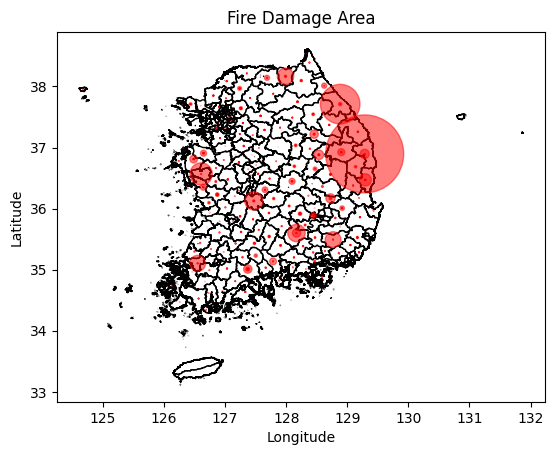

In [144]:
fig, ax = plt.subplots()
sig_gdf.plot(ax=ax, lw=1, color='white', edgecolor='black')

# Plot points with radius
for point, radius in fire:
    circle = plt.Circle((point.x, point.y), radius * 5e-3, color='red', alpha=0.5)
    ax.add_patch(circle)

# Set aspect ratio to be equal
ax.set_aspect('equal')
ax.set_title('Fire Damage Area')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()